## Scanning Data

In [ ]:
!pip install scanpy

In [2]:
import scanpy as sc

In [3]:
# read in our data

adata = sc.read_csv("raw_counts/GSM5226574_C51ctr_raw_counts.csv").T
adata

AnnData object with n_obs × n_vars = 6099 × 34546

In [4]:
# 6099 cells, 34546 genes
# adata.obs, adata.var, adata.X
adata.X.shape

(6099, 34546)

## Doublet Removal

In [5]:
# optional, but preferrable - because sometimes two or more cells can end up in the same droplet.
# my system cannot process this step without a better gpu - so I skipped this process. 
# check https://youtube.com/watch?app=desktop&v=uvyG9yLuNSE for these steps

## Preprocessing

In [6]:
# first need to label mitochondrial genes

adata.var['mt'] = adata.var.index.str.startswith('MT-')
adata.var

,mt
AL627309.1,False
AL627309.5,False
AL627309.4,False
AL669831.2,False
LINC01409,False
...,...
VN1R2,False
AL031676.1,False
SMIM34A,False
AL050402.1,False


In [7]:
import pandas as pd

In [8]:
# using list of ribosomal genes from the broad institute

ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"

In [9]:
# 88 ribosomal genes

ribo_genes = pd.read_table(ribo_url, skiprows=2, header=None)
ribo_genes

,0
0,FAU
1,MRPL13
2,RPL10
3,RPL10A
4,RPL10L
...,...
83,RPS9
84,RPSA
85,RSL24D1
86,RSL24D1P11


In [10]:
adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)
adata.var

,mt,ribo
AL627309.1,False,False
AL627309.5,False,False
AL627309.4,False,False
AL669831.2,False,False
LINC01409,False,False
...,...,...
VN1R2,False,False
AL031676.1,False,False
SMIM34A,False,False
AL050402.1,False,False


In [11]:
# calculate QC metrics

sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)

In [12]:
# sort genes by number of cells they were found in

adata.var.sort_values('n_cells_by_counts')

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AL445072.1,False,False,0,0.000000,100.000000,0.0
AC073270.1,False,False,0,0.000000,100.000000,0.0
AC073349.5,False,False,0,0.000000,100.000000,0.0
AC005482.1,False,False,0,0.000000,100.000000,0.0
SPDYE8P,False,False,0,0.000000,100.000000,0.0
...,...,...,...,...,...,...
AKAP13,False,False,4458,3.054271,26.906050,18628.0
NEAT1,False,False,4546,5.314150,25.463191,32411.0
MBNL1,False,False,4554,2.877029,25.332022,17547.0
ZBTB20,False,False,4699,2.601082,22.954583,15864.0


In [13]:
# remove genes that were not found in at least 3 cells

sc.pp.filter_genes(adata, min_cells=3)
adata.var.sort_values('n_cells_by_counts')

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells
AL929091.1,False,False,3,0.000492,99.950812,3.0,3
AC006441.3,False,False,3,0.000492,99.950812,3.0,3
AC022017.1,False,False,3,0.000492,99.950812,3.0,3
AC024597.1,False,False,3,0.000492,99.950812,3.0,3
PCARE,False,False,3,0.000492,99.950812,3.0,3
...,...,...,...,...,...,...,...
AKAP13,False,False,4458,3.054271,26.906050,18628.0,4458
NEAT1,False,False,4546,5.314150,25.463191,32411.0,4546
MBNL1,False,False,4554,2.877029,25.332022,17547.0,4554
ZBTB20,False,False,4699,2.601082,22.954583,15864.0,4699


In [14]:
adata.obs.sort_values('n_genes_by_counts')

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
TAGGGTTTCTGGCTGG-1_1,276,419.0,1.0,0.238663,1.0,0.238663
CGTGCTTCAAAGGGCT-1_1,277,432.0,41.0,9.490741,0.0,0.000000
TGACAGTTCTAAACGC-1_1,278,414.0,0.0,0.000000,0.0,0.000000
CTCTGGTCACGACGAA-1_1,285,407.0,0.0,0.000000,0.0,0.000000
GTAAGTCGTATCGCGC-1_1,289,430.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...
TAACTTCCAACCACGC-1_1,5158,15645.0,221.0,1.412592,211.0,1.348674
CACTGAAGTCGAAGCA-1_1,5487,12725.0,355.0,2.789784,82.0,0.644401
AGGCCACAGAGTCACG-1_1,5544,13217.0,417.0,3.155028,82.0,0.620413
ATTCACTGTAACAGGC-1_1,6686,19020.0,404.0,2.124080,115.0,0.604627


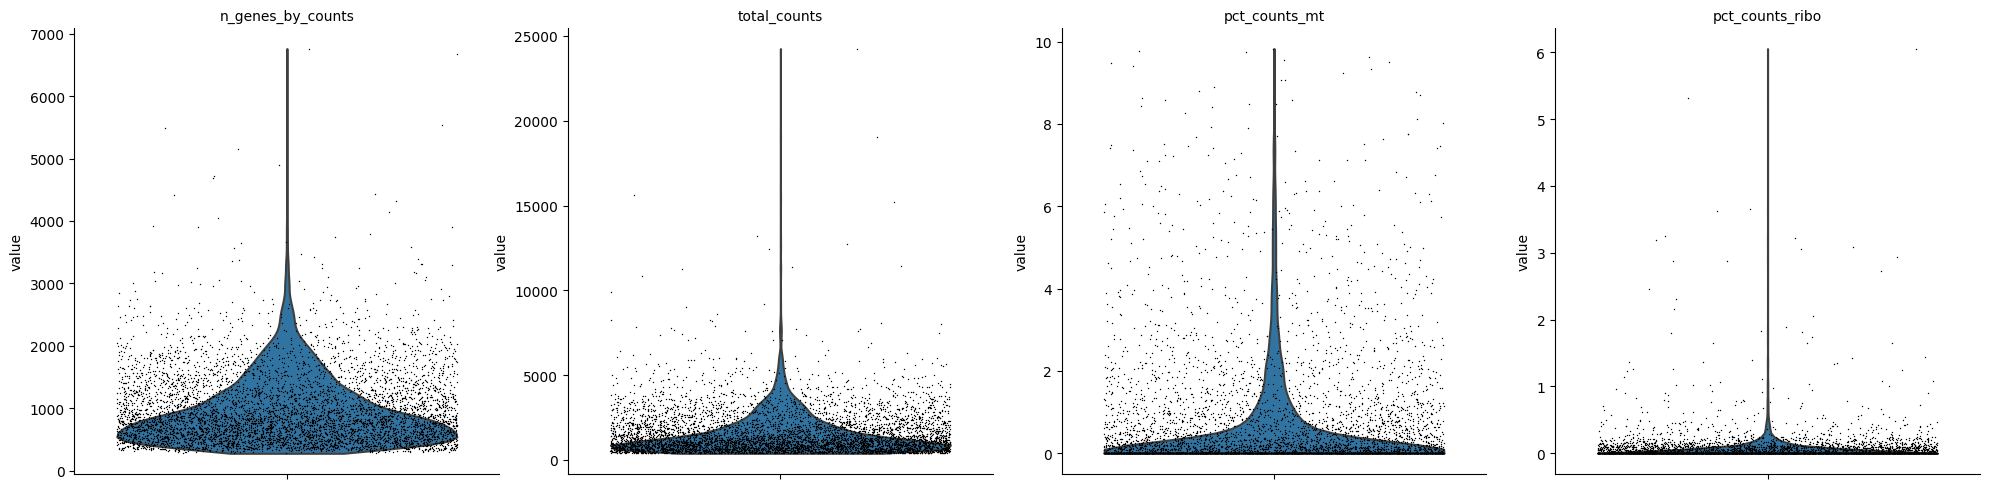

In [16]:
# use QC metrics to get rid of outliers
# if cell has significant higher genes than average, there is a chance it is some artifact
# if there is a high mitochondrial percentage, it could be a sequencing artifact or the cell might be dying

sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'], 
             jitter=0.4, multi_panel=True)

In [22]:
# use numpy to get 98th percentile value and filter the genes accordingly

import numpy as np

In [21]:
upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98)
upper_lim

2479.08

In [24]:
adata = adata[adata.obs.n_genes_by_counts < upper_lim]
adata = adata[adata.obs.pct_counts_mt < 20]
adata = adata[adata.obs.pct_counts_ribo < 2]
adata.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
CGTTCTGGTACTAGCT-1_1,2434,6047.0,6.0,0.099223,1.0,0.016537
CTGGCAGGTTCGGTAT-1_1,2444,5899.0,307.0,5.204272,5.0,0.084760
ACACCAACACAACGCC-1_1,2451,5497.0,0.0,0.000000,3.0,0.054575
CCTCAACCATACAGGG-1_1,2276,5434.0,38.0,0.699301,0.0,0.000000
ACAAAGATCCACAGGC-1_1,2310,5504.0,1.0,0.018169,1.0,0.018169
...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,355,410.0,3.0,0.731707,0.0,0.000000
CACTGGGGTCTACGTA-1_1,346,403.0,0.0,0.000000,0.0,0.000000
CATACTTGTAGAGGAA-1_1,360,410.0,2.0,0.487805,0.0,0.000000
TTTGGTTTCCACGGAC-1_1,299,405.0,0.0,0.000000,2.0,0.493827


## Normalization

In [25]:
# in single cell sequencing there is  alot of variation between cells (because of sequencing biases, etc.)
# so we need to normalize them in order to compare cells and genes

In [29]:
# gene counts in each cell
adata.X.sum(axis = 1)

array([6043., 5895., 5496., ...,  410.,  405.,  410.], dtype=float32)

In [32]:
sc.pp.normalize_total(adata, target_sum=10000) #normalize every cell to 10,000 UMI

In [33]:
adata.X.sum(axis = 1)

array([10000., 10000., 10000., ..., 10000., 10000., 10000.], dtype=float32)

In [34]:
sc.pp.log1p(adata) # change to log counts

In [35]:
adata.X.sum(axis = 1)

array([3155.047  , 3218.0122 , 3416.0486 , ..., 1191.2708 , 1022.75116,
       1162.8785 ], dtype=float32)

In [36]:
# save raw data before we filter based on genes and manipulating on more data
adata.raw = adata

## Clustering

In [37]:
# find 2000 most variable genes

sc.pp.highly_variable_genes(adata, n_top_genes = 2000)
adata.var

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm
AL627309.1,False,False,8,0.001312,99.868831,8.0,8,False,0.011136,2.697174,1.153160
AL627309.5,False,False,33,0.005411,99.458928,33.0,33,False,0.028855,2.254608,-0.150810
AL627309.4,False,False,4,0.000656,99.934415,4.0,4,False,0.002331,1.702854,-1.776494
LINC01409,False,False,274,0.048697,95.507460,297.0,274,False,0.270478,2.286819,-0.055904
FAM87B,False,False,6,0.000984,99.901623,6.0,6,False,0.006682,1.947490,-1.055700
...,...,...,...,...,...,...,...,...,...,...,...
AL354822.1,False,False,133,0.022627,97.819315,138.0,133,False,0.153974,2.375807,0.206288
AL592183.1,False,False,1003,0.198721,83.554681,1212.0,1003,False,0.875225,2.469386,-0.406744
AC240274.1,False,False,162,0.027382,97.343827,167.0,162,False,0.150268,2.265893,-0.117561
AC007325.4,False,False,4,0.000656,99.934415,4.0,4,False,0.002801,1.579830,-2.138971


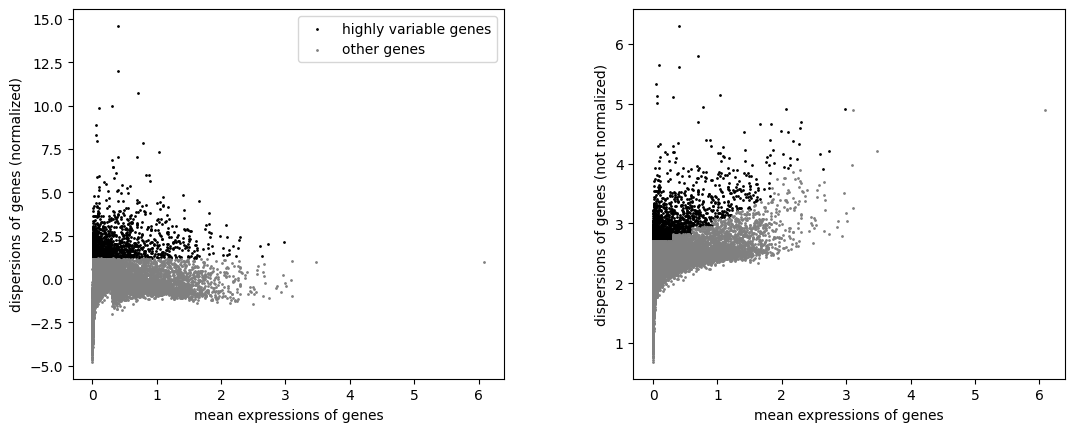

In [39]:
# genes with higher dispersion marked as highly variable genes
# reduces dimensions of your dataset by being able to remove lowly-variable genes

sc.pl.highly_variable_genes(adata)

In [41]:
# filter out the genes that are not as highly variable

adata = adata[:, adata.var.highly_variable]
adata

View of AnnData object with n_obs × n_vars = 5960 × 2000
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [42]:
# regress out differences that result from counts of genes
# gets rid of variations due to processing and sample quality

sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'pct_counts_ribo'])

In [43]:
# normalize each gene to the unit variance of that gene

sc.pp.scale(adata, max_value=10)

In [44]:
# run PCA to reduce the dimensions of the dataset

sc.tl.pca(adata, svd_solver='arpack')

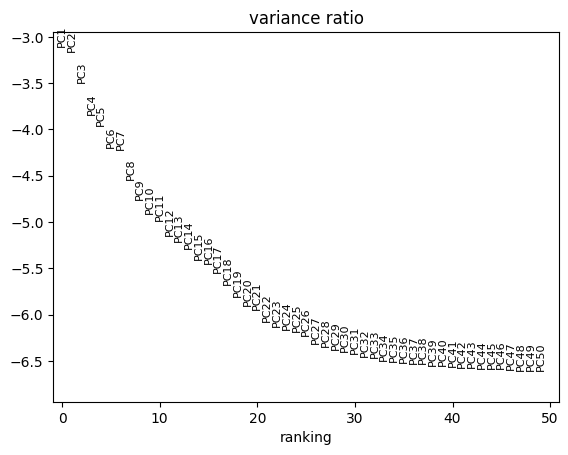

In [45]:
# plot how much the 50 PC's contribute to the data

sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)

In [47]:
# find the elbow of the plot to cutoff the PC's
# calculate the neighbors of the cells for the clustering steps to follow
# this step will create a connectivities and distances matrix in adata

sc.pp.neighbors(adata, n_pcs = 30)

/Users/thomasstack/opt/anaconda3/envs/single_cell/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


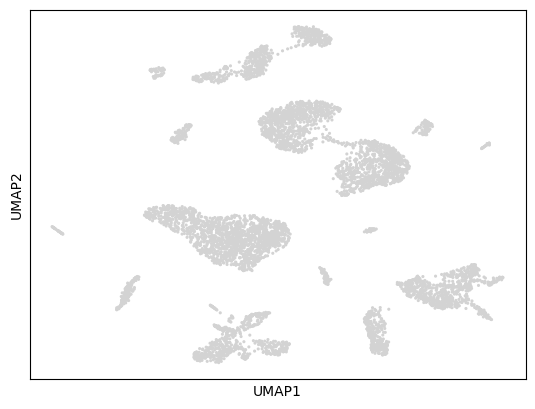

In [48]:
# use umap to project the data from the 30 dimensions into 2 dimensions

sc.tl.umap(adata)
sc.pl.umap(adata)

In [ ]:
!pip install leidenalg

In [57]:
# resolution closer to 1 will generate more clusters, and vice versa if it is closer to 0

sc.tl.leiden(adata, resolution = 0.5)

In [58]:
# adds new column with leiden label

adata.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,leiden
CGTTCTGGTACTAGCT-1_1,2434,6047.0,6.0,0.099223,1.0,0.016537,2
CTGGCAGGTTCGGTAT-1_1,2444,5899.0,307.0,5.204272,5.0,0.084760,2
ACACCAACACAACGCC-1_1,2451,5497.0,0.0,0.000000,3.0,0.054575,1
CCTCAACCATACAGGG-1_1,2276,5434.0,38.0,0.699301,0.0,0.000000,11
ACAAAGATCCACAGGC-1_1,2310,5504.0,1.0,0.018169,1.0,0.018169,2
...,...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,355,410.0,3.0,0.731707,0.0,0.000000,6
CACTGGGGTCTACGTA-1_1,346,403.0,0.0,0.000000,0.0,0.000000,1
CATACTTGTAGAGGAA-1_1,360,410.0,2.0,0.487805,0.0,0.000000,0
TTTGGTTTCCACGGAC-1_1,299,405.0,0.0,0.000000,2.0,0.493827,12


/Users/thomasstack/opt/anaconda3/envs/single_cell/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


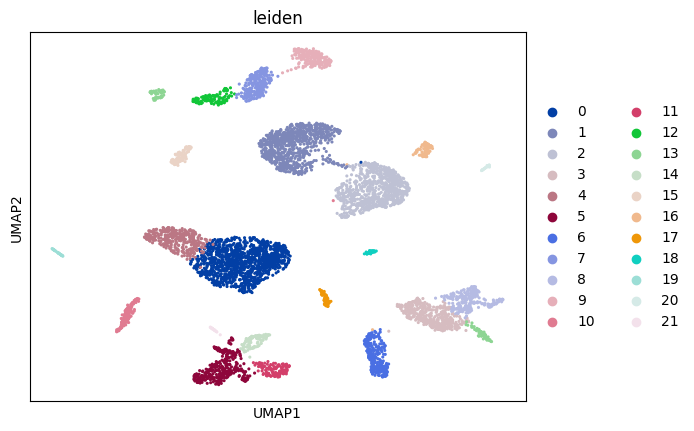

In [59]:
sc.pl.umap(adata, color=['leiden'])

## Integration

In [53]:
# to be done if you are using more than one sample and need to integrate them all into one batch
# check https://youtube.com/watch?app=desktop&v=uvyG9yLuNSE for these steps